In [1]:
import numpy as np
from sklearn import svm
import matplotlib.colors
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import accuracy_score
import pandas as pd
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from time import time
from pprint import pprint

In [3]:
def save_image(im, i):
    im = 255 - im.values.reshape(28, 28)
    a = im.astype(np.uint8)
    output_path = '.\\fashion'
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    Image.fromarray(a).save(output_path + ('\\%d.png' % i))

In [2]:
def save_result(model):
    print(data_test.shape)
    x_test = data_test.drop('label', axis=1)
    print(x_test.shape)
    print('正在预测')
    data_test_pred = model.predict(x_test)
    data_test['Label'] = data_test_pred
    data_test.to_csv('Prediction.csv', header=True, index=True, columns=['Label'])
    print('预测完成，结果保存到Prediction.csv中')

In [14]:
if __name__ == "__main__":
    classifier_type = 'SVM'#可通过classifier_type的更改选择SVM或随机森林（相比之下SVM真的慢）
    print('载入训练数据...')
    t = time()
    data = pd.read_csv('.\\fashion-mnist_train.csv', header=0, dtype=int)
    print('载入完成，耗时%f秒' % (time() - t))
    x, y = data.iloc[:, 1:], data['label']
    x_train, x_valid, y_train, y_valid = train_test_split(x, y, train_size=0.8, random_state=1)
    print(x.shape, x_valid.shape)
    print('图片个数：%d，图片像素数目：%d' % x.shape)

    print('载入测试数据...')
    t = time()
    data_test = pd.read_csv('.\\fashion-mnist_test.csv', header=0, dtype=int)
    print('载入完成，耗时%f秒' % (time() - t))

载入训练数据...
载入完成，耗时9.495173秒
(60000, 784) (12000, 784)
图片个数：60000，图片像素数目：784
载入测试数据...
载入完成，耗时2.493652秒


In [6]:
    if classifier_type == 'SVM':
        model = svm.SVC(C=1000, kernel='rbf', gamma=1e-10)
        print('SVM开始训练...')
        history = []  # 用于记录每次训练和验证的准确率及耗时
    
    t = time()
    t_start = time()
    model.fit(x_train, y_train)
    t = time() - t
    t_start = time()
    print('%s训练结束，耗时%d分钟%.3f秒' % (classifier_type, int(t/60), t - 60*int(t/60)))
    
    t = time()
    t_pred = time()
    y_train_pred = model.predict(x_train)
    t = time() - t
    t_pred = time() - t_pred
    history.append(('train', accuracy_score(y_train, y_train_pred)*100, t_pred))
    print('%s训练集准确率：%.3f%%，耗时%d分钟%.3f秒' % (classifier_type, accuracy_score(y_train, y_train_pred)*100, int(t/60), t - 60*int(t/60)))
    
    t = time()
    t_pred = time()
    y_valid_pred = model.predict(x_valid)
    t = time() - t
    t_pred = time() - t_pred
    print('%s测试集准确率：%.3f%%，耗时%d分钟%.3f秒' % (classifier_type, accuracy_score(y_valid, y_valid_pred)*100, int(t/60), t - 60*int(t/60)))
    history.append(('valid', accuracy_score(y_valid, y_valid_pred)*100, t_pred))
    

SVM开始训练...
SVM训练结束，耗时10分钟35.653秒
SVM训练集准确率：87.465%，耗时28分钟49.971秒
SVM测试集准确率：85.925%，耗时7分钟19.055秒


In [21]:
    save_result(model)

(10000, 785)
(10000, 784)
正在预测
预测完成，结果保存到Prediction.csv中


In [12]:
    data_pred = pd.read_csv('.\\Prediction.csv', header=0, dtype=int)
    data_pred = data_pred['Label']
    data_pred

0       0
1       1
2       2
3       0
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: Label, Length: 10000, dtype: int32

In [10]:
    data_real = data_test['label']
    data_real

0       0
1       1
2       2
3       2
4       3
       ..
9995    0
9996    6
9997    8
9998    8
9999    1
Name: label, Length: 10000, dtype: int32

In [33]:
accuracy_score(data_real, data_pred)*100

86.77

In [22]:
# 随机选择一些样本进行展示
indices = np.random.choice(len(data_pred), 10)
images = data_test.drop('label', axis=1).iloc[indices].values#提取一行
labels_true = data_real[indices]
labels_pred = data_pred[indices]
images.shape

(10, 784)

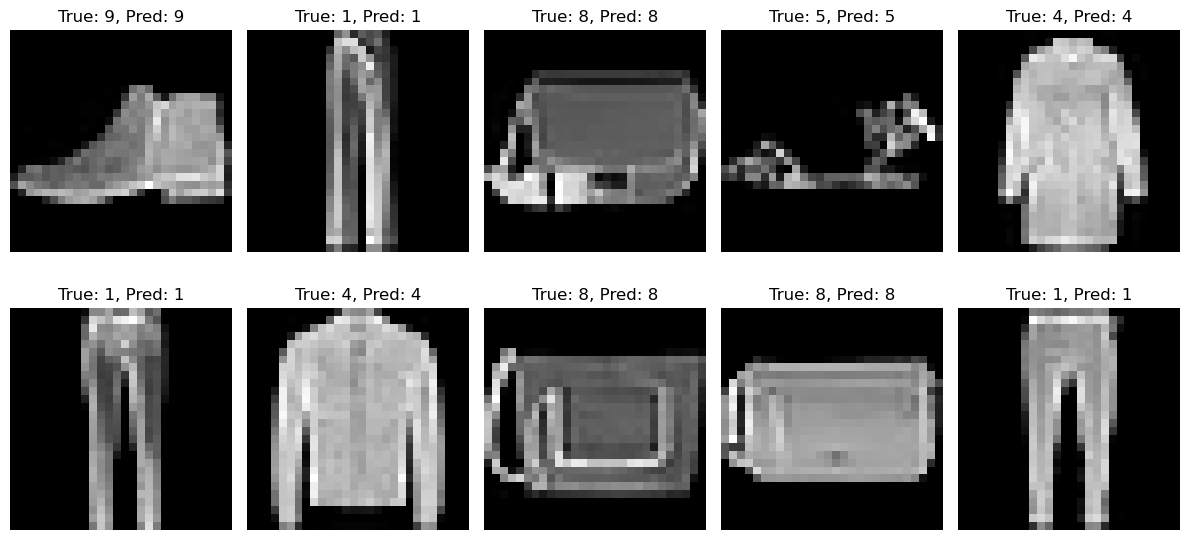

In [23]:
assert isinstance(images, np.ndarray)#"确保images是numpy数组"
# 展示图像及其真实和预测标签
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for img, true_label, pred_label, ax in zip(images, labels_true, labels_pred, axes.flatten()):
    ax.imshow(img.reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {true_label}, Pred: {pred_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()